<a href="https://colab.research.google.com/github/Mcuong17/DoanWEB-demo/blob/main/Airline_Time_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Giới thiệu topic
Đối mặt với sự chậm trễ của các chuyến bay luôn là một điều rất phiền toái với khách hang bởi vì điều đó là điều họ không thể dự đoán hay lường trước rằng việc delay chuyến bay sẽ xảy ra. Việc chậm trễ khi bay có thể dẫn đến lãng phí thời gian và có thể làm xáo trộn lịch bay của chuyến bay tiếp theo. Do đó bài phân tích này nhằm mục đích kiểm tra các dữ liệu của các chuyến bay và tìm hiểu các dạng chậm trễ của chuyến bay, giúp khách hang có thể dự đoán được sự chậm trễ đó xảy ra như thế nào.

# Data Pre Processing( Tiền xử lý dữ liệu)
Đầu tiên chúng ta sẽ thêm các thư viện cần dùng
Những thư viện được sử dụng đó là:
1.   Numpy: được sử dụng cho các hàm tính toán, xử lý các mảng dữ liệu numberic
2.   Pandas: Được sử dụng để xử lý các vấn đề liên quan đến dữ liệu, dataset...
3.    Matplotlib và Seaborn: Được sử dụng cho việc trực quan hóa dữ liệu
4.    Sklearn: Tạo mô hình và chứa một số chức năng tiền xử lý dữ liệu hữu ích



In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Load dataframe

In [3]:

df1 = pd.read_csv("/content/gdrive/MyDrive/Dataset/1999.csv")
df1.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1999,1,27,3,1906.0,1908,2024.0,2005,US,1244,...,3,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1999,1,28,4,2016.0,1908,2126.0,2005,US,1244,...,19,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1999,1,29,5,1907.0,1908,2000.0,2005,US,1244,...,2,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1999,1,31,7,1932.0,1908,2031.0,2005,US,1244,...,6,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1999,1,1,5,1601.0,1535,1707.0,1645,US,297,...,11,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [16]:
df2 = pd.read_csv("/content/gdrive/MyDrive/Dataset/2000.csv")

In [17]:
df = pd.concat([df1, df2])

## Tổng quan về dataframe, tên các cột và kích thước của df

In [ ]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Dựa vào dữ liệu đã cung cấp: Dataset bao gồm hơn 11 triệu observation về chuyến bay với 29 cột:
*   **Year [int]:** Bao gồm thông tin về năm(1999&2000)
*   **Month [int]:** Thông tin về tháng(1 - Jan, 2 - Feb..)
*   **DayofMonth [int]**: Ngày trong tháng(1-31, nếu có)
*   **DayOfWeek [int]**: Ngày trong tuần(1 - Mon, 2 - Tue..)
*   **DepTime [int]**: Thời gian khởi hành thực tế(theo múi giờ địa phương)
*   **CRSDepTime [int]**: Thời gian khởi hành theo lịch trình(theo múi giờ địa phương)
*   **ArrTime [int]**: Thời gian thực tế(theo múi giờ địa phương)
*   **UniqueCarrier [int]**: Mã nhà cung cấp dịch vụ để xác định các nhà cung cấp dịch vụ trong file carriers.csv
*   **FlightNum [int]**: Số chuyến bay
*   **TailNum [str]**: Số hiệu trên đuôi máy bay có trong file plane-data.csv
*   **ActualElapsedTime [int]**: Sự khác biệt giữa ArrTime và DepTime trong vài phút, đồng thời cũng là tổng của AirTime, TaxiIn, TaxiOut
*   **CRSElapsedTime [int]**:  Sự khác biệt giữa CRSArrTime và CRSDepTime trong vài phút
*   ** ArrDelay [int]:**Sự khác biệt giữa ArrTime và CRSArrTime trong vài phút
*    **DepDelay [int]**: Sự khác biệt giữa DepTime and CRSDepTime trong vài phút
*    **Origin [str]**: Sử dụng để xác định mã sân bay IATA mà chuyến bay đã khởi hành trong file airports.csv
*    **Dest [str]**: Sử dụng để xác định mã sân bay IATA mà chuyến bay đã khởi hành trong file airports.csv
*    **Distance [int]**: Khoảng cách bay( tính bằng dặm)
*    **TaxiIn [int]**: Thời gian taxi đến tính bằng phút
*    **TaxiOut [int]**: Thời gian taxi trả tính bằng phút
*    **Cancelled [int]**: Hủy chuyến bay(1 - bị hủy, 0 - Không bị hủy)
*    **CancellationCode [str]**: Lý do hủy chuyến bay ( A - Hãng vận chuyển, B - Thời tiết, C - Hệ thống hàng không quốc gia, D - An ninh)
*   ** Diverted [int]**: chuyển hướng( 1 - Chuyển hướng, 0 - không chuyển hướng)
*   **WeatherDelay [int]**: Sự chậm trễ ảnh hưởng do thời tiết tính bằng phút
*   **NASDelay [int]**: Sự chậm trễ ảnh hưởng do hệ thống hàng không quốc gia gây ra trong vài phút
*  ** LateAircraftDelay [int]**: Sự chậm trể ảnh hưởng bởi chuyến bay trước cũng bị muộn

-  Dựa trên các cột, có 3 taajo dữ liệu bổ sung cần thêm vào như sau:
*   **airports.csv**: Chứa thông tin về các chuyến bay khởi hành và chuyến bay đến
*   **carriers.csv:** Chứa thông tin về hãng bay
*   **plane-data.csv**: Chứa thông tin về máy bay


In [9]:
airport_df = pd.read_csv("/content/gdrive/MyDrive/Dataset/airports.csv")
carriers_df = pd.read_csv("/content/gdrive/MyDrive/Dataset/carriers.csv")
plane_df = pd.read_csv("/content/gdrive/MyDrive/Dataset/plane-data.csv")

  Tên cột và hình dạng bảng dữ liệu

In [ ]:
airport_df.columns, airport_df.shape

(Index(['iata', 'airport', 'city', 'state', 'country', 'lat', 'long'], dtype='object'),
 (3376, 7))

In [10]:
carriers_df.columns, cariers_df.shape

(Index(['Code', 'Description'], dtype='object'), (1491, 2))

In [6]:
plane_df.columns, plane_df.shape

(Index(['tailnum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
        'aircraft_type', 'engine_type', 'year'],
       dtype='object'), (5029, 9))

In [7]:
airport_df.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [11]:
carriers_df.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [13]:
plane_df.tail() # do head() không chứa thông tin hữu ích

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998
5028,N999DN,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992


Qua phân tích các dataset:
airports.csv chứa iata, airport, state, country, lat & long sẽ được sử dụng để gắn thẻ tên và cho biết vị trí của các sân bay
carriers.csv: chứa Code và Decription sử dụng để gắn thẻ tên của nhà cung cấp dịch vụ
plane-data chứa tailnum, type, manufacturer, issue_date, model, status, aircraft_type, engine_type & year sẽ được sử dụng để gắn thẻ các chi tiết sản xuất của máy bay

# Data Exploration

## Question 1: Thời gian tốt nhất trong ngày, tuần và thời gian trong năm sẽ giảm thiểu sự chậm trễ khi bay

Đầu tiên ta có: Tổng thời gian khi trễ được tính bằng cách trừ ActualElapsedTime(Thời gian thực tế) cho CRSElapsedTime(Thời gian đã trôi qua). Thời gian khởi hành của mỗi nhóm quan sát được nhóm theo giờ. Ví dụ 1920 sẽ thuộc nhóm 1900 - 1959. Cuối cùng thống kê mô tả về tổng thời gian trễ được kiểm tra theo giờ, theo ngày trong tuần

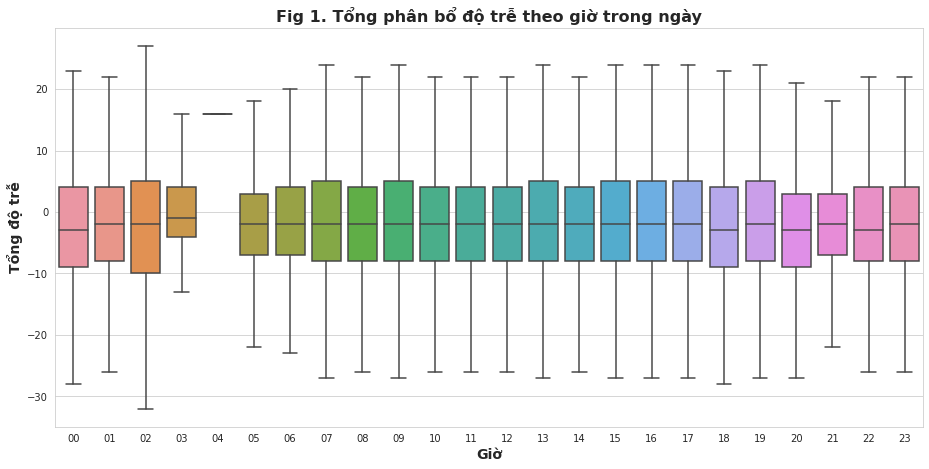

In [19]:
df["total_delay"] = df["ActualElapsedTime"] - df["CRSElapsedTime"]

def get_hour(time):
    return "00" if str(time)[:-2] == "24" else str(time)[:-2].zfill(2)

df["hr"] = df["CRSDepTime"].apply(get_hour)

sns.set_style("whitegrid")
fig1, ax1 = plt.subplots(figsize=(12.8, 6.4), constrained_layout=True)
ax1 = sns.boxplot(x="hr", y="total_delay", order=np.sort(df["hr"].unique()), data=df[["total_delay", "hr"]], showfliers=False)
ax1.set_title("Fig 1. Tổng phân bổ độ trễ theo giờ trong ngày", fontdict={"weight": "bold", "fontsize": 16})
ax1.set_xlabel("Giờ", fontdict={"weight": "bold", "fontsize": 14})
ax1.set_ylabel("Tổng độ trễ", fontdict={"weight": "bold", "fontsize": 14})
pass

Sự phân bố tổng số lần chậm trễ được so sánh theo giờ. Nhìn vào Hình 1, ta thấy hầu hết các chuyến bay có thời gian trễ trung bình là 2 phút nhưng có sự thay đổi lớn về độ trễ lên đến 20 phút. Các chuyến bay lúc 03:00 giờ có mức độ chậm trễ thay đổi thấp nhất( không bao gồm 04 giờ có thời gian trễ trung bình thấp nhất) và có thời gian trễ trung bình là 1 phút. 
Vì vậy, các chuyến bay lúc 03:00 giờ sẽ là một lựa chọn tốt và giảm thiểu khả năng bị hoãn lâu.

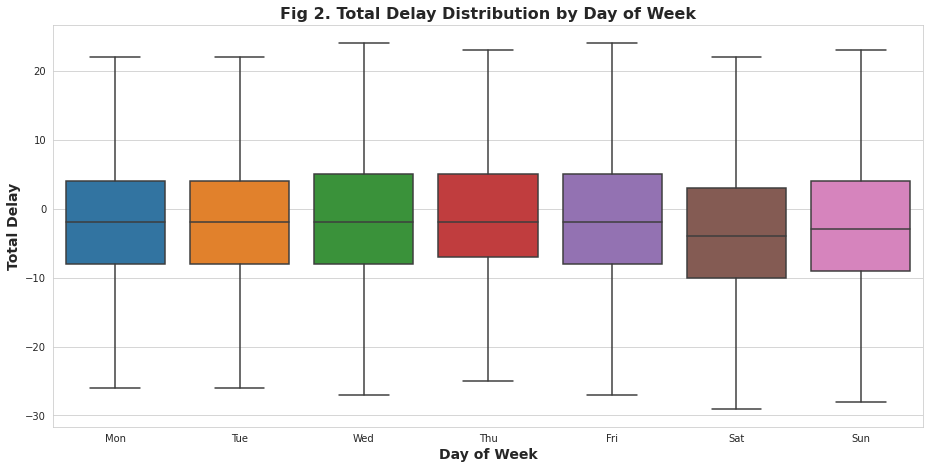

In [20]:
sns.set_style("whitegrid")
fig2, ax2 = plt.subplots(figsize=(12.8, 6.4), constrained_layout=True)
ax2 = sns.boxplot(x="DayOfWeek", y="total_delay", order=np.sort(df["DayOfWeek"].unique()), data=df[["total_delay", "DayOfWeek"]], showfliers=False)
ax2.set_title("Fig 2. Total Delay Distribution by Day of Week", fontdict={"weight": "bold", "fontsize": 16})
ax2.set_xlabel("Day of Week", fontdict={"weight": "bold", "fontsize": 14})
ax2.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
ax2.set_ylabel("Total Delay", fontdict={"weight": "bold", "fontsize": 14})
pass